In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv(r'C:\Users\TajwarAbtahee\OneDrive - JCW Resourcing\Desktop\Python\practice\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
#how many weekdays are in the data?
print(df.day.value_counts())
print(str(df.day.nunique()) + ' different days')

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
4 different days


In [16]:
#how many dinners and lucnes are there?
time=pd.DataFrame(df.time.value_counts())
time

,time
Dinner,176
Lunch,68


C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


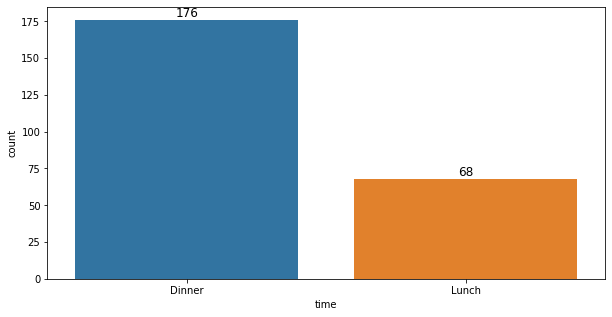

In [32]:
plt.figure(figsize=(10,5))
a=sns.countplot(df.time)
a.bar_label(container=a.containers[0],labels=time.time,size=12)
plt.show()

In [34]:
#what is the propertion of dinner and lunch in percentages?
df.time.value_counts(normalize=True).round(decimals=2)

Dinner    0.72
Lunch     0.28
Name: time, dtype: float64

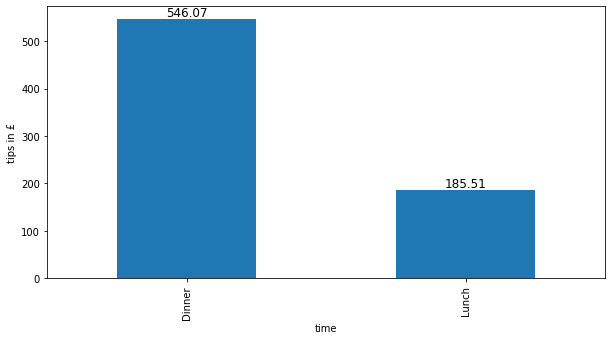

In [48]:
c=pd.DataFrame(df.groupby('time').sum().tip.round(decimals=2))
#does lunch or dinner accumulate more tips?
plt.figure(figsize=(10,5))
d=df.groupby('time').sum().tip.plot(kind='bar')
d.bar_label(container=d.containers[0], labels=c.tip,size=12)
plt.ylabel('tips in £')
plt.show()

#dinner generates almost 3 times as much in tips compared to dinner

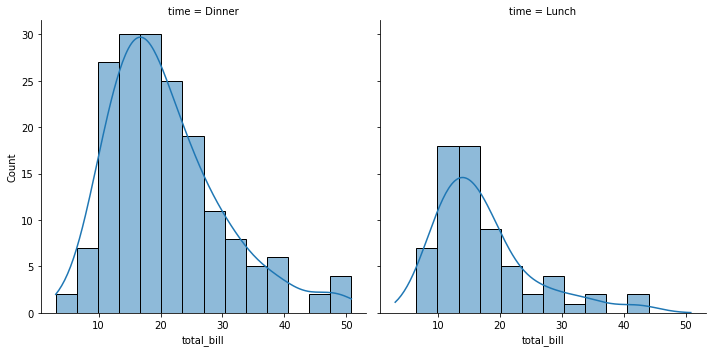

In [68]:
sns.displot(df,x='total_bill',col='time',kde=True)

smoker        No       Yes
sex                       
Female  2.773519  2.931515
Male    3.113402  3.051167


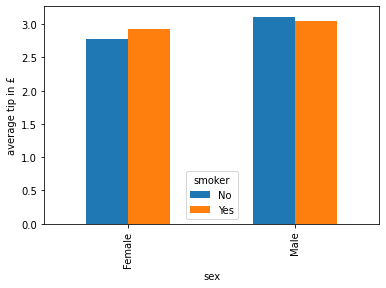

In [54]:
pd.pivot_table(df,index='sex', columns='smoker',values='tip').plot(kind='bar')
plt.ylabel('average tip in £')
print(pd.pivot_table(df,index='sex', columns='smoker',values='tip'))

#female smokers get higher tips, male non smokers get higher tips
#overall males get higher tips than females

In [64]:
#lets find the percentage of the tip compared to the bill
df['tip_pct']=(df.tip/df.total_bill).round(decimals=2)
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10


In [66]:
print('the average tip is '+ str(df.tip_pct.mean()*100) +'%')

the average tip is 16.09426229508197%


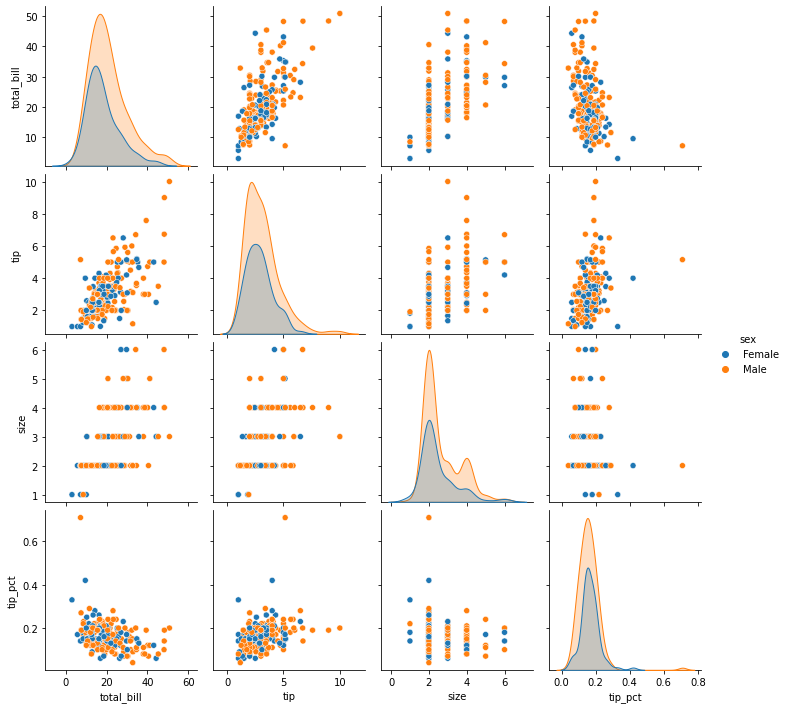

In [77]:
#lets compare relationships between variables with respect to sex
sns.pairplot(df, hue='sex')

<AxesSubplot:>

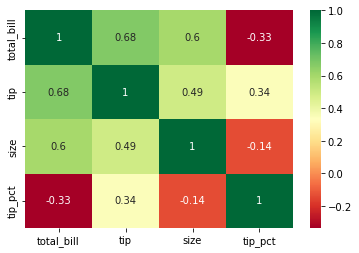

In [83]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
#tip vs total bill has the highest relation with males getting more than females
#as total bill increases,tip percentage decreases, higher amounts with makes on total bill but females tend to receive a higher tip percentage